# Load the data and libraries

Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the data

In [ ]:
train=pd.read_csv('/content/Mobile_data.csv')

Audit the data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [ ]:
train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


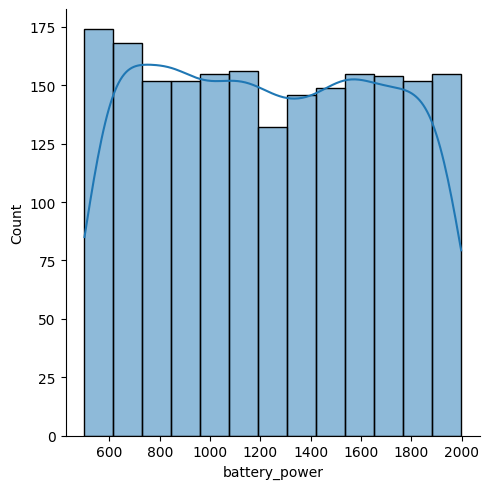

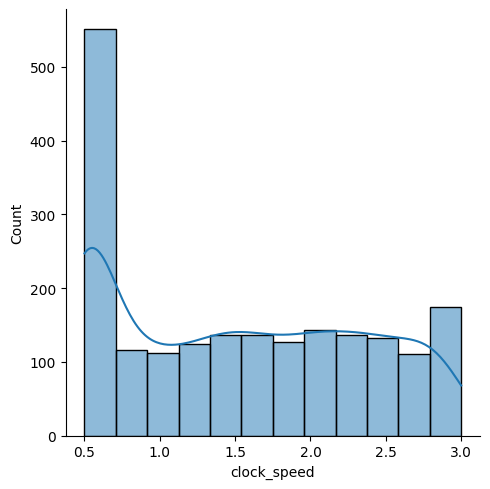

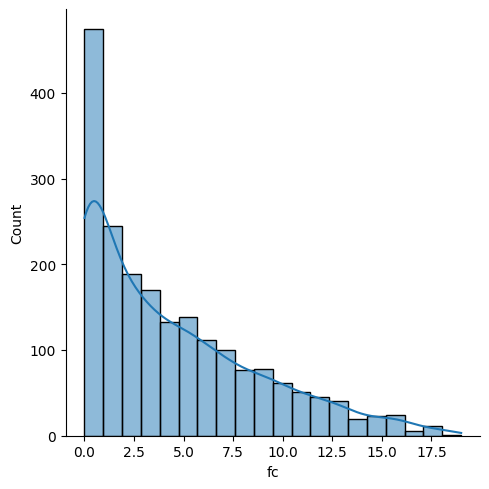

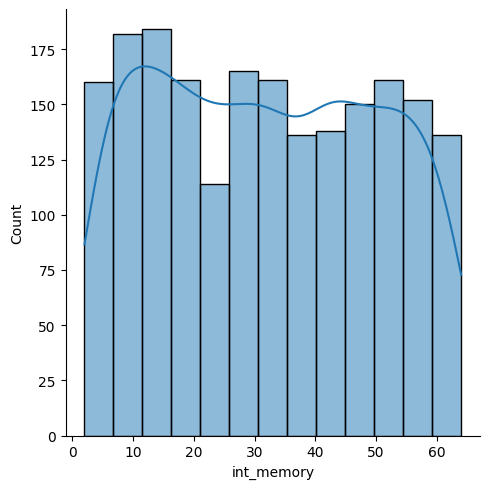

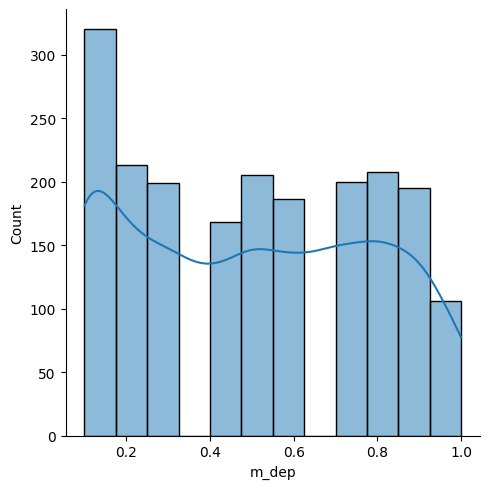

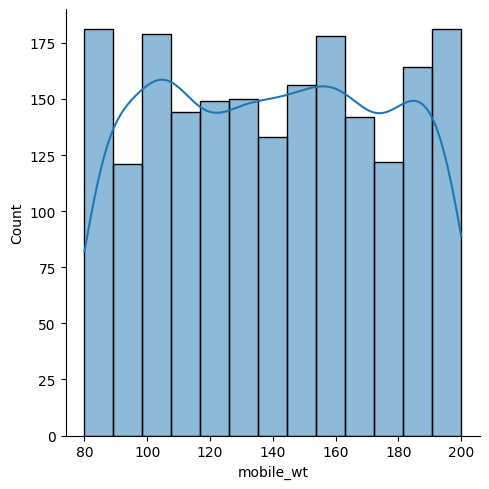

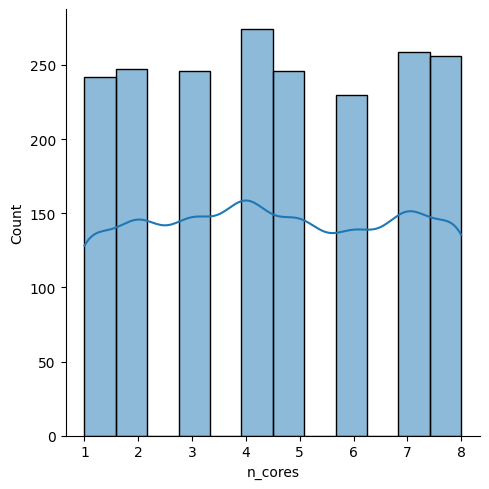

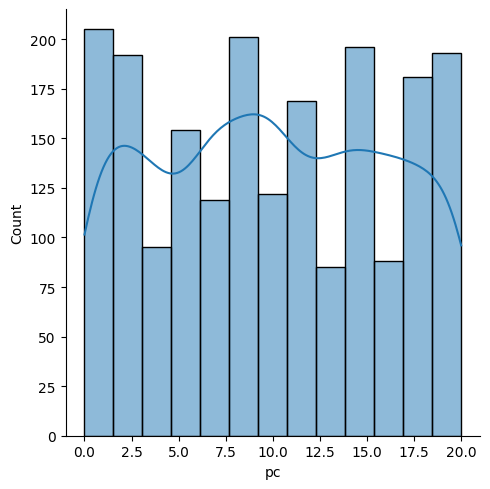

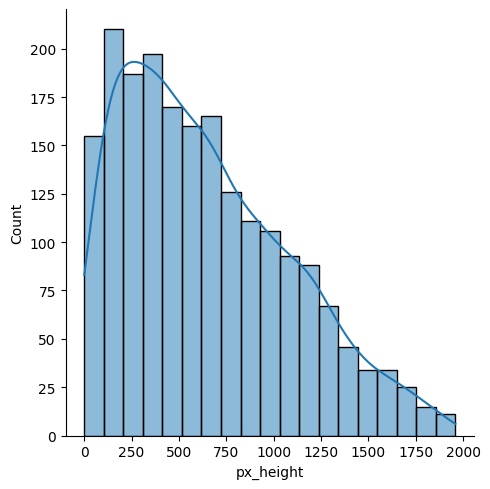

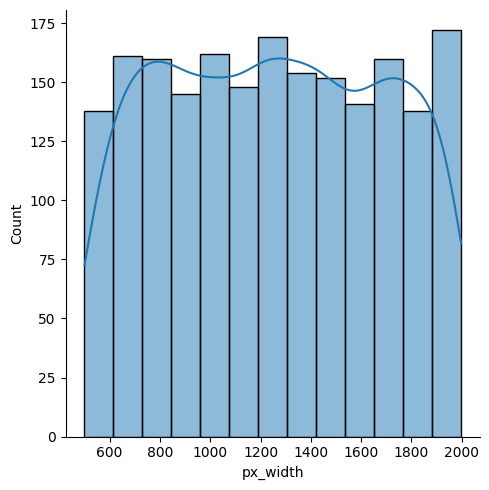

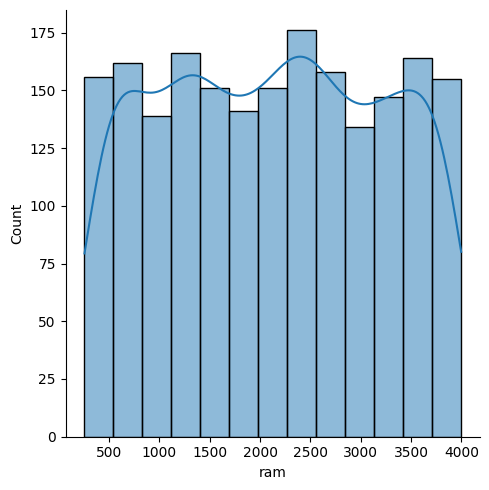

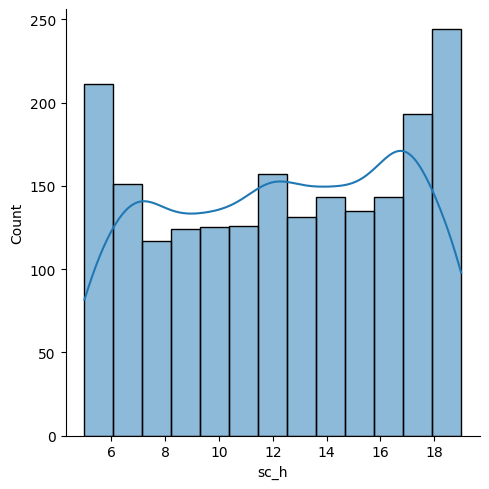

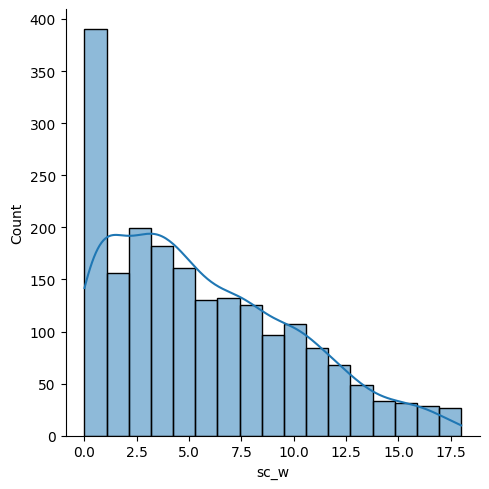

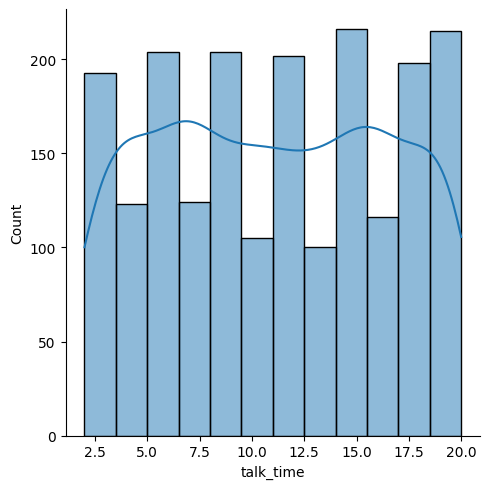

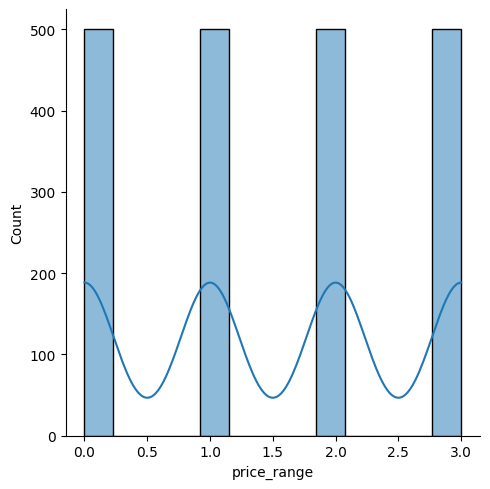

In [ ]:
for i in train.columns:
  sns.displot(train[i],kde=True)

In [ ]:
train.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

<Axes: >

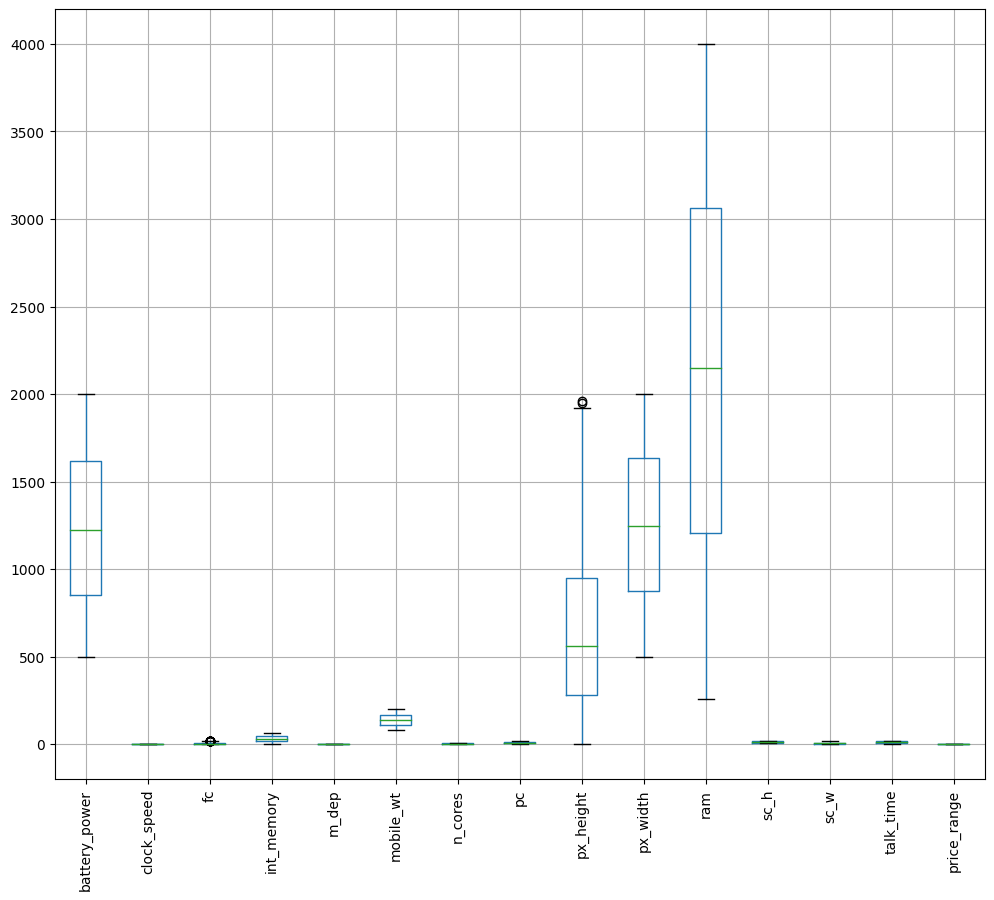

In [ ]:
train.boxplot(rot=90,figsize=(12,10))


<Axes: xlabel='fc'>

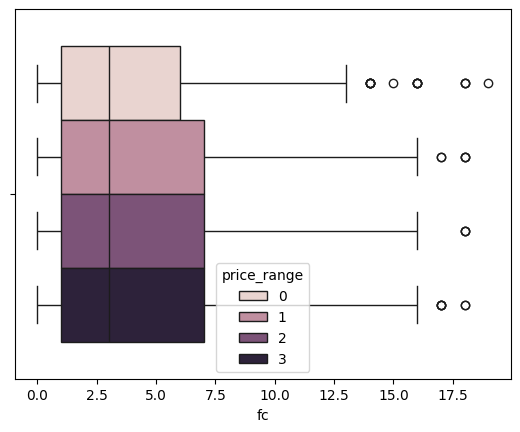

In [ ]:
sns.boxplot(data=train, x='fc', hue='price_range')

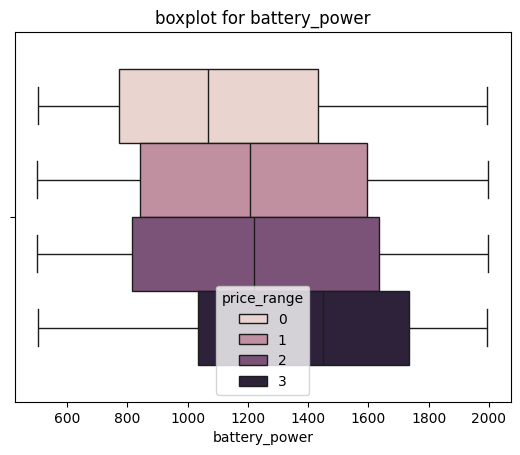

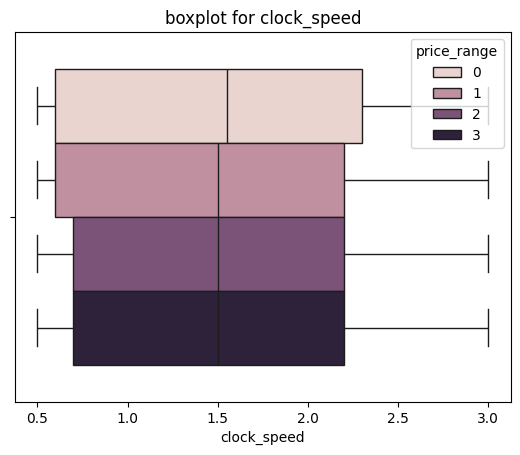

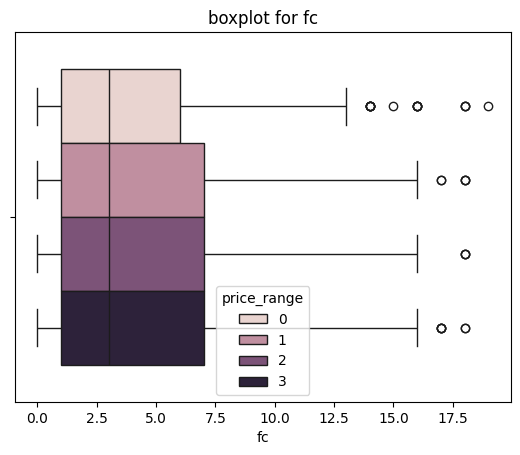

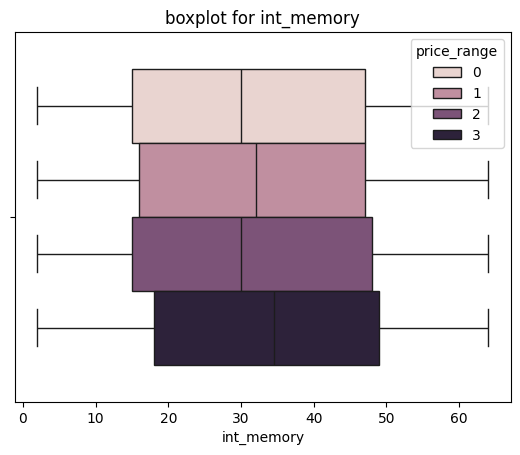

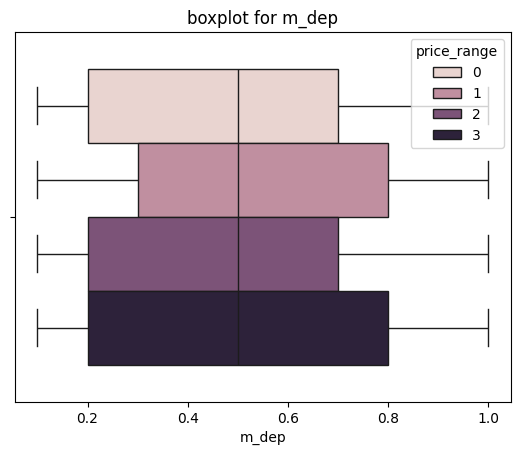

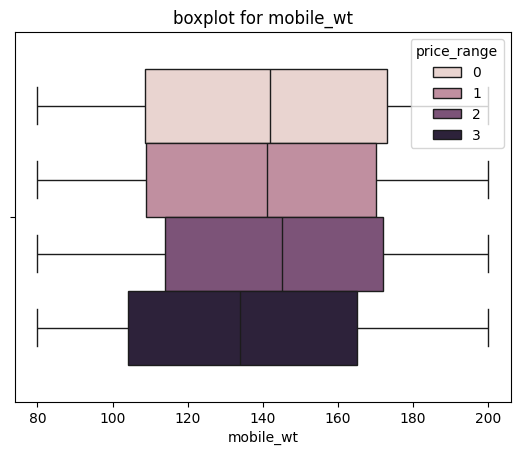

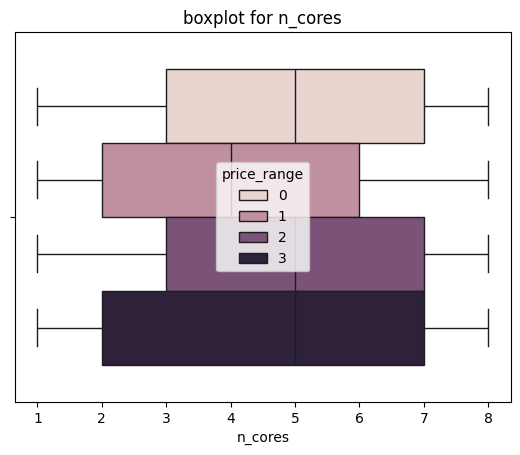

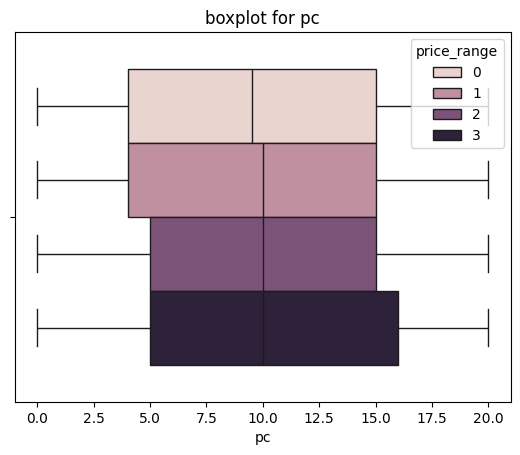

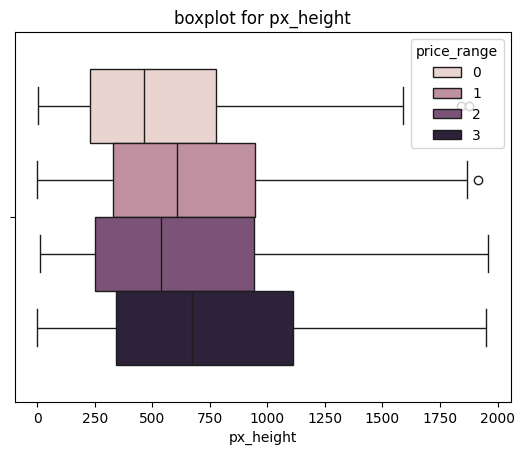

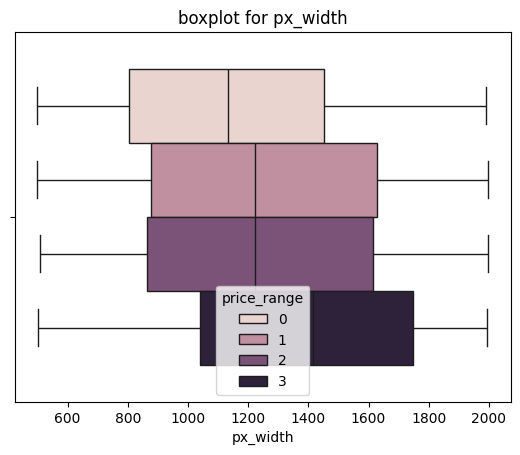

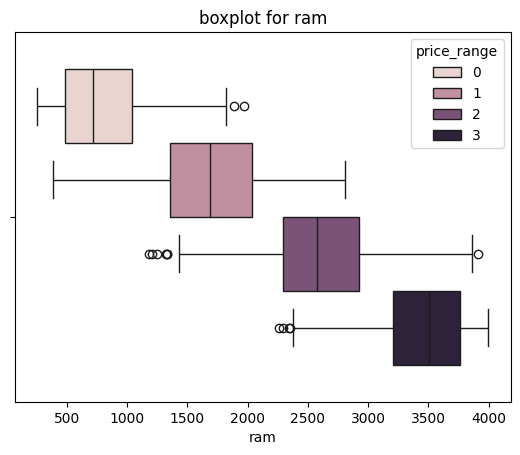

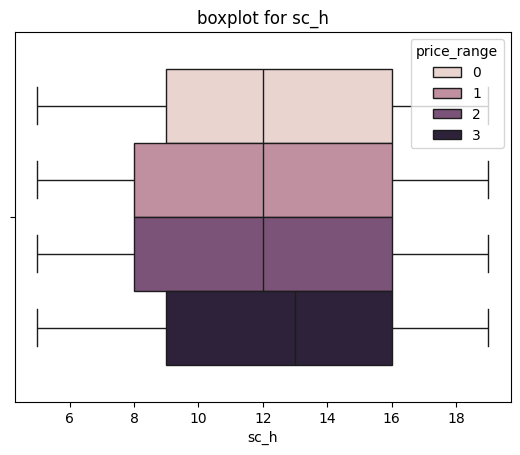

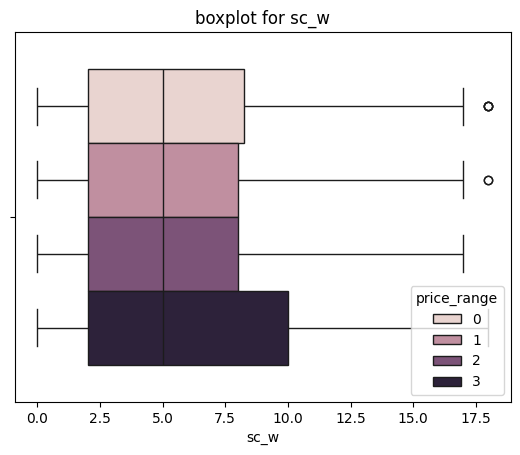

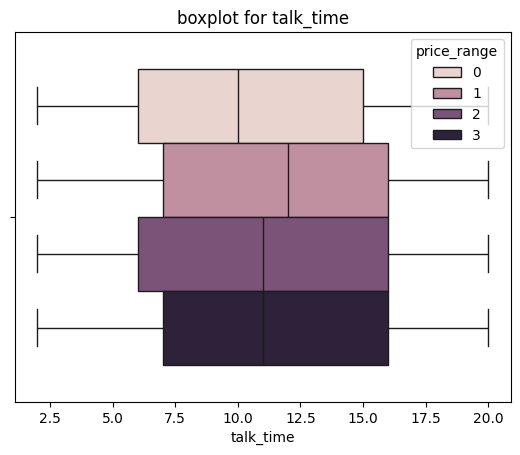

In [ ]:
for i in train.columns:
  if i!='price_range':
    sns.boxplot(x = train[i], hue = train['price_range'])
    plt.title(f"boxplot for {i}")
    plt.show()

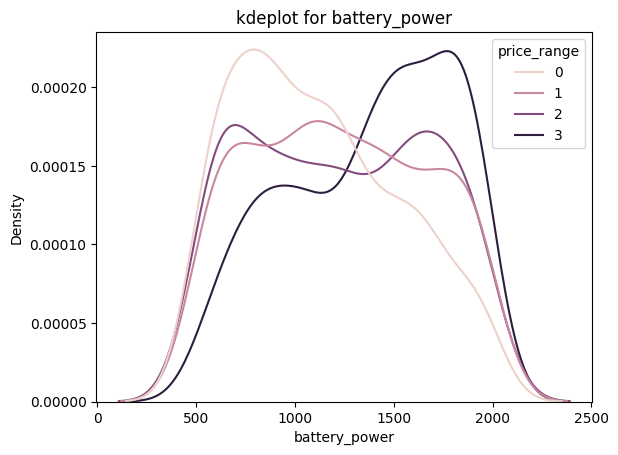

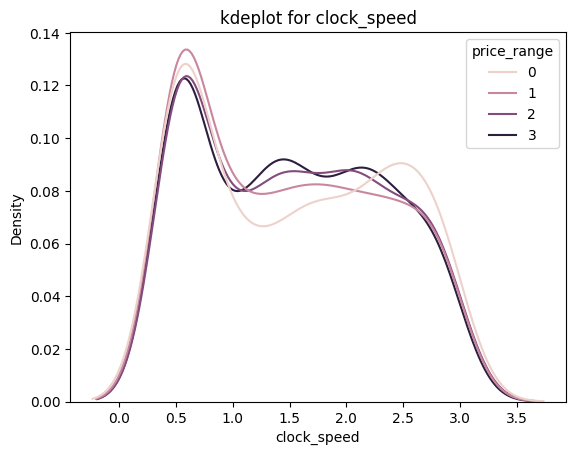

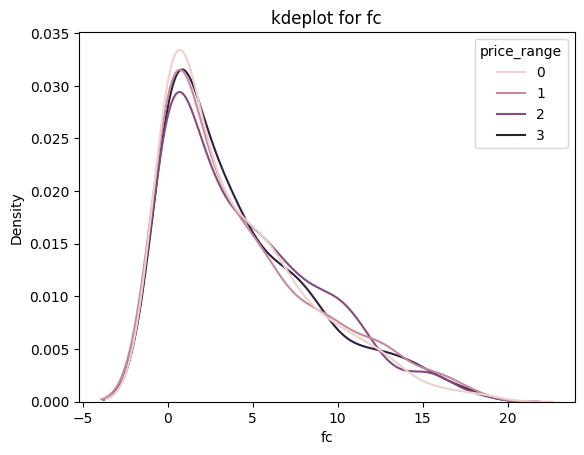

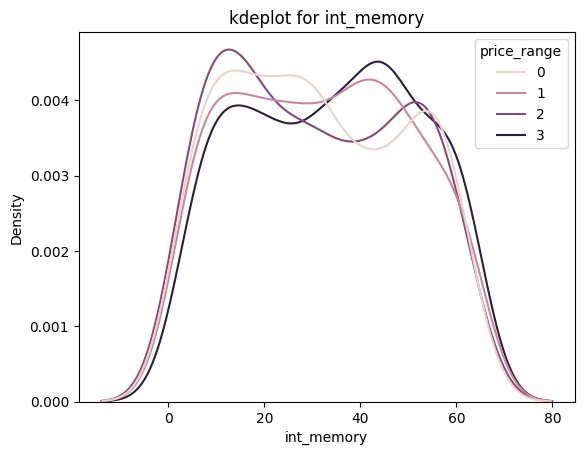

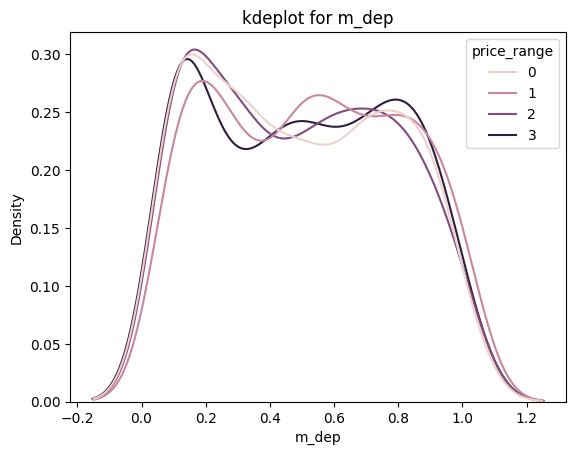

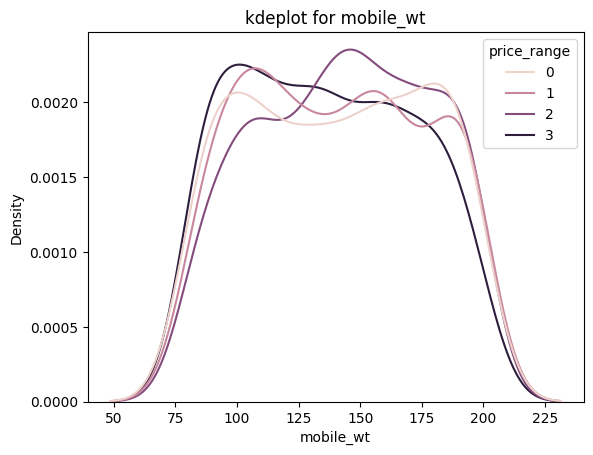

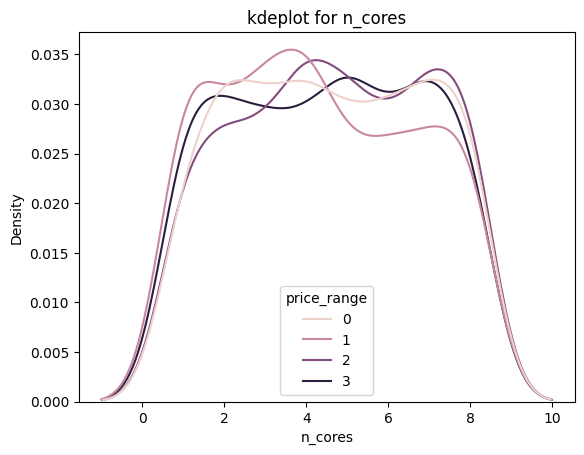

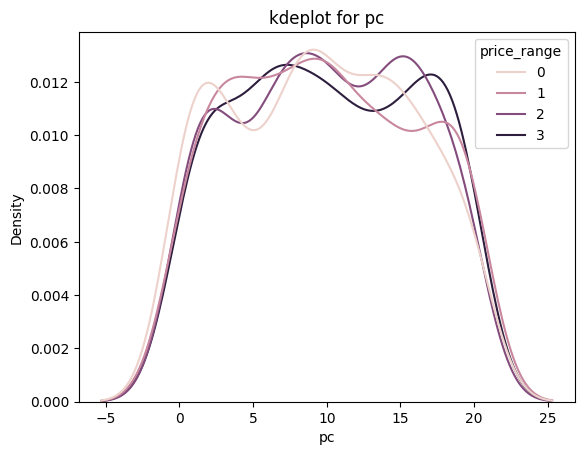

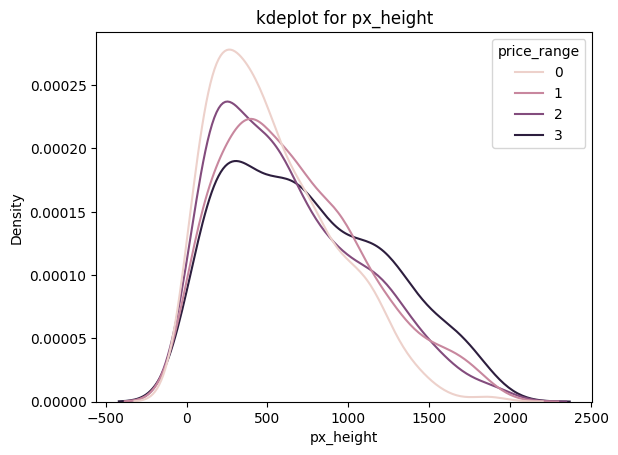

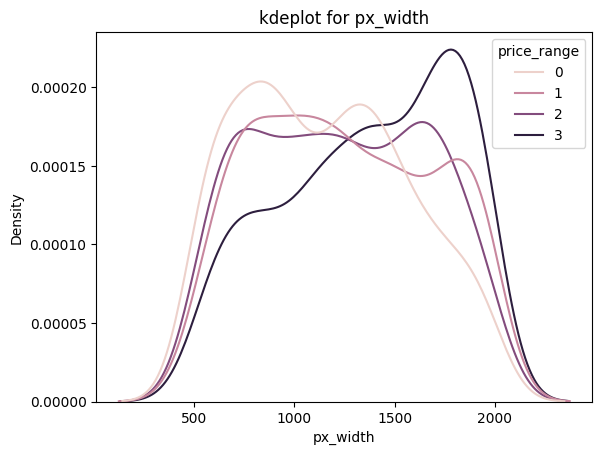

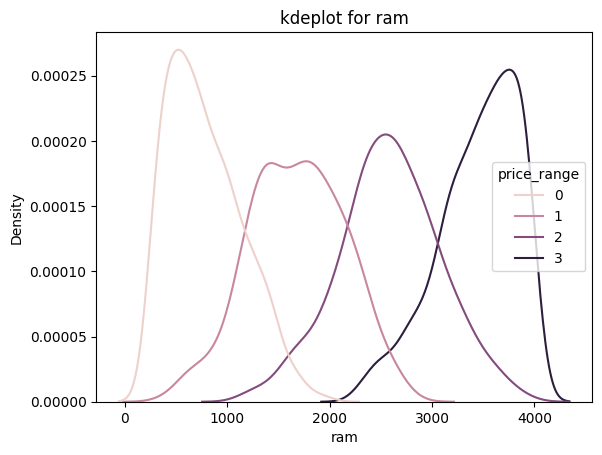

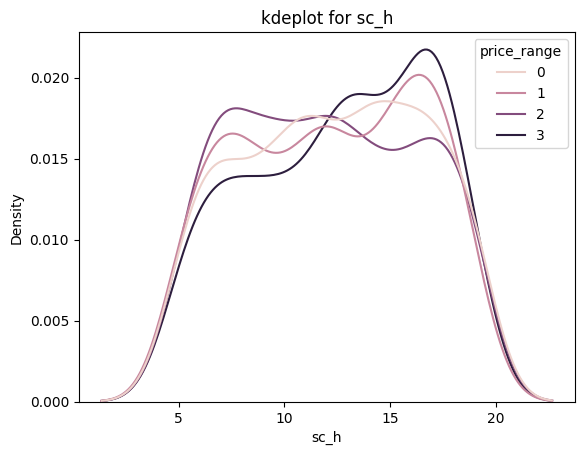

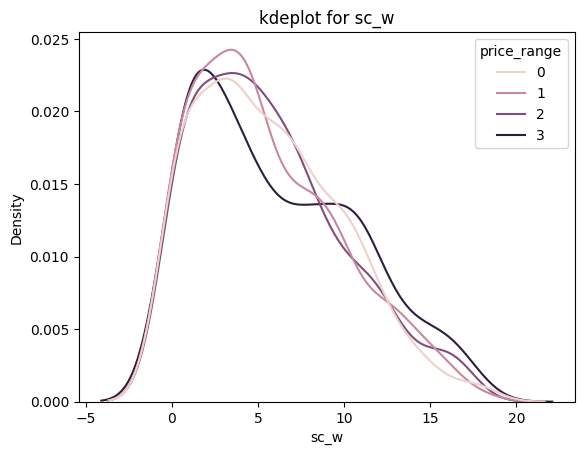

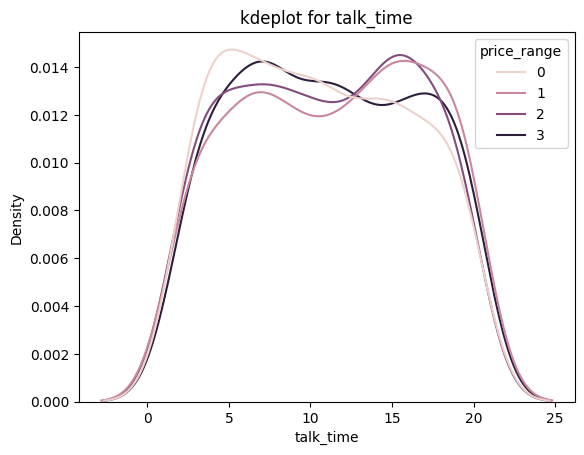

In [ ]:
for i in train.columns:
  if i!='price_range':
    sns.kdeplot(x = train[i], hue = train['price_range'])
    plt.title(f"kdeplot for {i}")
    plt.show()

# Bivariate Analysis

<Axes: >

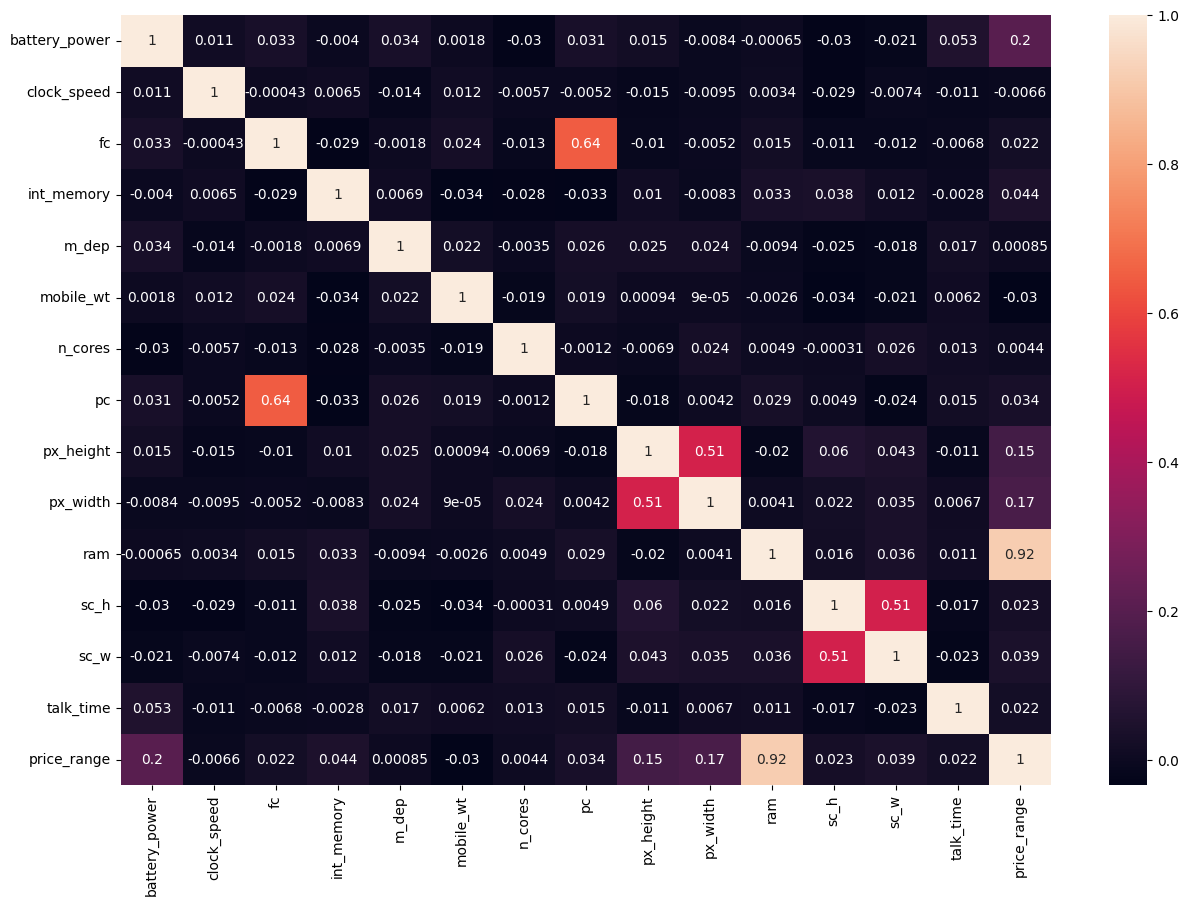

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)

# Data Preparation

Splitting the data into x and y

In [ ]:
x=train.drop(['price_range'],axis=1)
y=train['price_range']

In [ ]:
x.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 218.9 KB


Split the data into train and test

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(max_iter=1000)
#fit the model
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
logreg.coef_

array([[-1.81598845e-03,  6.85399820e-02, -1.74531400e-02,
         2.93992200e-02,  1.09781202e-02,  4.29546107e-02,
         1.54007468e-01,  8.93351018e-02, -2.32964209e-03,
         1.01857299e-04, -5.88726476e-03,  2.14331382e-01,
         5.15412680e-02,  1.25246936e-01],
       [-5.65648404e-05, -2.90497884e-03,  1.45682168e-02,
         1.12349039e-02,  9.33803211e-03,  1.16471541e-02,
         7.21304303e-03,  1.03541550e-02, -2.52220827e-04,
         2.60556089e-04, -8.22776094e-04,  6.20345548e-02,
        -7.35912412e-03,  3.52455563e-02],
       [ 6.91184859e-04, -5.83786874e-03,  2.89201270e-02,
        -1.46980115e-02, -2.13189406e-03, -1.31312389e-02,
        -6.13727460e-04, -4.05601218e-02,  8.42528538e-04,
        -1.07348545e-04,  2.24563641e-03, -8.41366376e-02,
        -2.50141609e-02, -5.32186510e-02],
       [ 1.18136843e-03, -5.97971344e-02, -2.60352038e-02,
        -2.59361124e-02, -1.81842582e-02, -4.14705260e-02,
        -1.60606784e-01, -5.91291349e-02,  1.

In [ ]:
logreg.intercept_

array([ 0.03336666,  0.01060009, -0.00091221, -0.04305454])

In [ ]:
y_hat_train_lr = logreg.predict(x_train)
y_hat_test_lr = logreg.predict(x_test)

In [ ]:
y_train

1264    1
722     1
210     2
252     1
297     1
       ..
1122    3
1346    3
1406    1
1389    0
1534    2
Name: price_range, Length: 1600, dtype: int64

In [ ]:
y_hat_train_lr

array([3, 1, 3, ..., 0, 0, 2])

# Model Evaluation

Dealing with y_train,y_test, y_hat_train,y_hat_test

In [ ]:
conf_matrix_train=confusion_matrix(y_train,y_hat_train_lr)
print(conf_matrix_train)

[[349  63   1   0]
 [ 48 261  83   8]
 [  1  82 205  96]
 [  0   3  72 328]]


In [ ]:
conf_matrix_test=confusion_matrix(y_test,y_hat_test_lr)
print(conf_matrix_test)

[[75 12  0  0]
 [12 67 17  4]
 [ 0 20 62 34]
 [ 0  0 12 85]]


In [ ]:
print("Accuracy score for the train data is:",accuracy_score(y_train,y_hat_train_lr))

Accuracy score for the train data is: 0.714375


In [ ]:
print("Accuracy score for the test data is:",accuracy_score(y_test,y_hat_test_lr))

Accuracy score for the test data is: 0.7225


In [ ]:
print(classification_report(y_train,y_hat_train_lr))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       413
           1       0.64      0.65      0.65       400
           2       0.57      0.53      0.55       384
           3       0.76      0.81      0.79       403

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600



In [ ]:
print(classification_report(y_test,y_hat_test_lr))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        87
           1       0.68      0.67      0.67       100
           2       0.68      0.53      0.60       116
           3       0.69      0.88      0.77        97

    accuracy                           0.72       400
   macro avg       0.73      0.74      0.73       400
weighted avg       0.72      0.72      0.72       400



# Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=4)
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train, y_hat_train_dtree)

The accuracy of the model is: 0.83
[[389  24   0   0]
 [ 39 349  12   0]
 [  0 118 214  52]
 [  0   1  28 374]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       413
           1       0.71      0.87      0.78       400
           2       0.84      0.56      0.67       384
           3       0.88      0.93      0.90       403

    accuracy                           0.83      1600
   macro avg       0.83      0.82      0.82      1600
weighted avg       0.84      0.83      0.82      1600



In [ ]:
model_eval(y_test, y_hat_test_dtree)

The accuracy of the model is: 0.77
[[79  8  0  0]
 [15 78  7  0]
 [ 0 37 61 18]
 [ 0  0  8 89]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        87
           1       0.63      0.78      0.70       100
           2       0.80      0.53      0.64       116
           3       0.83      0.92      0.87        97

    accuracy                           0.77       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.77      0.76       400



In [ ]:
pd.DataFrame({'col_name':dtree.feature_importances_},index=x.columns).sort_values(by='col_name',ascending=False)

,col_name
ram,0.860306
battery_power,0.077614
px_height,0.032999
px_width,0.029081
clock_speed,0.000000
fc,0.000000
int_memory,0.000000
m_dep,0.000000
mobile_wt,0.000000
n_cores,0.000000


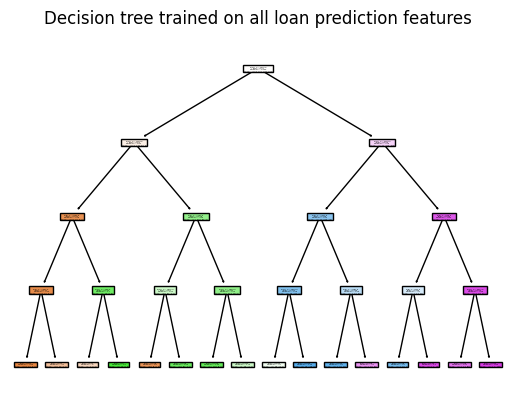

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeClassifier(max_depth = 4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all loan prediction features")
plt.show()

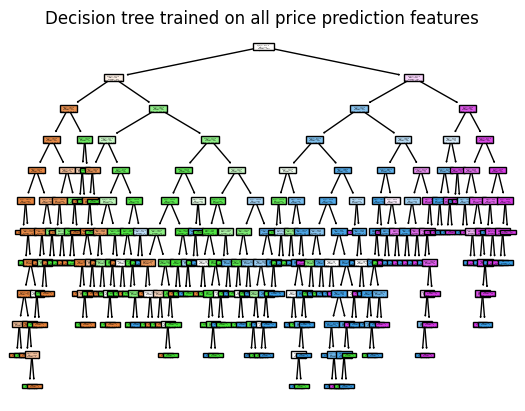

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf = DecisionTreeClassifier().fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all price prediction features")
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=200,criterion='entropy')
#fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [ ]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.9
[[87  0  0  0]
 [ 9 86  5  0]
 [ 0 12 96  8]
 [ 0  0  5 92]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        87
           1       0.88      0.86      0.87       100
           2       0.91      0.83      0.86       116
           3       0.92      0.95      0.93        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400





*   before tuning:low bias high variance(1.0,0.89)
*   after tuning:low bias low variance(1.0,0.9)



# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
y_hat_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_ada)

The accuracy of the model is: 0.83
[[392  21   0   0]
 [ 67 286  47   0]
 [  0  41 301  42]
 [  0   0  56 347]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       413
           1       0.82      0.71      0.76       400
           2       0.75      0.78      0.76       384
           3       0.89      0.86      0.88       403

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



In [ ]:
model_eval(y_test,y_hat_test_ada)

The accuracy of the model is: 0.83
[[83  4  0  0]
 [18 70 12  0]
 [ 0 12 92 12]
 [ 0  0 11 86]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        87
           1       0.81      0.70      0.75       100
           2       0.80      0.79      0.80       116
           3       0.88      0.89      0.88        97

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400





*   before hyperparameter tuning:high bias low variance
*   after tuning: high bias low variance



# Gradient Boosting

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_gb)

The accuracy of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 383   1]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test,y_hat_test_gb)

The accuracy of the model is: 0.9
[[84  3  0  0]
 [ 7 89  4  0]
 [ 0  9 98  9]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.88      0.89      0.89       100
           2       0.90      0.84      0.87       116
           3       0.91      0.93      0.92        97

    accuracy                           0.90       400
   macro avg       0.90      0.91      0.90       400
weighted avg       0.90      0.90      0.90       400



before tuning: low bias high variance

#XGBoosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(n_estimators=200,max_depth=4)

In [ ]:
xgb.fit(x_train,y_train)
y_hat_train_xgb=xgb.predict(x_train)
y_hat_test_xgb=xgb.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_xgb)

The accuracy of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test,y_hat_test_xgb)

The accuracy of the model is: 0.92
[[ 84   3   0   0]
 [  6  91   3   0]
 [  0   7 103   6]
 [  0   0   6  91]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        87
           1       0.90      0.91      0.91       100
           2       0.92      0.89      0.90       116
           3       0.94      0.94      0.94        97

    accuracy                           0.92       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.92      0.92      0.92       400





*   before tuning: low bias high variance(1.0,0.92)
*   after tuning: low bias high variance(1.0,0.92)



KNN_K nearest neighbour

In [ ]:
np.sqrt(1600)

40.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=41)
knn.fit(x_train,y_train)
y_hat_train_knn=knn.predict(x_train)
y_hat_test_knn=knn.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_knn)

The accuracy of the model is: 0.93
[[405   8   0   0]
 [ 16 370  14   0]
 [  0  28 335  21]
 [  0   0  18 385]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       413
           1       0.91      0.93      0.92       400
           2       0.91      0.87      0.89       384
           3       0.95      0.96      0.95       403

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [ ]:
model_eval(y_test,y_hat_test_knn)

The accuracy of the model is: 0.92
[[ 86   1   0   0]
 [  8  89   3   0]
 [  0   8 101   7]
 [  0   0   6  91]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.91      0.89      0.90       100
           2       0.92      0.87      0.89       116
           3       0.93      0.94      0.93        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
for i in range(1,100):
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  y_hat_test_knn=knn.predict(x_test)
  y_hat_train_knn=knn.predict(x_train)
  accuracy_test=model_eval(y_train,y_hat_train_knn)
  accuracy_test=model_eval(y_test,y_hat_test_knn)
  accuracy_list=[]


The accuracy of the model is: 1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600

The accuracy of the model is: 0.88
[[80  7  0  0]
 [ 6 88  6  0]
 [ 0  8 96 12]
 [ 0  0  7 90]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        87
           1       0.85      0.88      0.87       100
           2       0.88      0.83      0.85       116
           3       0.88      0.93      0.90        97

    accuracy                           0.89       400
   macro avg       0.89      0.8

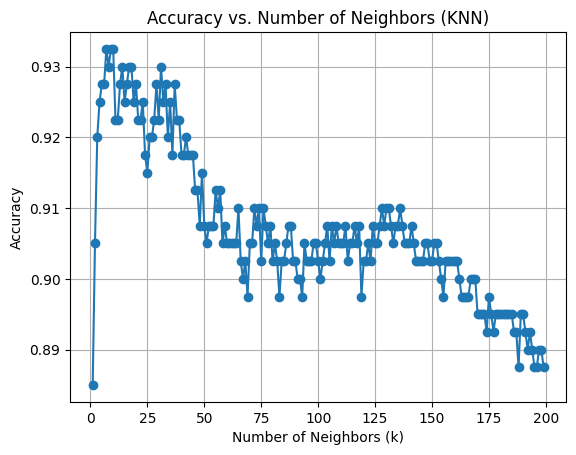

In [ ]:
k_values = range(1, 200)  # Vary k from 1 to 200
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neighbors (KNN)")
plt.grid(True)
plt.show()

In [ ]:
accuracies

[0.885,
 0.905,
 0.92,
 0.925,
 0.9275,
 0.9275,
 0.9325,
 0.93,
 0.9325,
 0.9325,
 0.9225,
 0.9225,
 0.9275,
 0.93,
 0.925,
 0.9275,
 0.93,
 0.93,
 0.925,
 0.9275,
 0.9225,
 0.9225,
 0.925,
 0.9175,
 0.915,
 0.92,
 0.92,
 0.9225,
 0.9275,
 0.9225,
 0.93,
 0.925,
 0.9275,
 0.92,
 0.925,
 0.9175,
 0.9275,
 0.9225,
 0.9225,
 0.9175,
 0.9175,
 0.92,
 0.9175,
 0.9175,
 0.9175,
 0.9125,
 0.9125,
 0.9075,
 0.915,
 0.9075,
 0.905,
 0.9075,
 0.9075,
 0.9075,
 0.9125,
 0.91,
 0.9125,
 0.905,
 0.9075,
 0.905,
 0.905,
 0.905,
 0.905,
 0.905,
 0.91,
 0.9025,
 0.9,
 0.9025,
 0.8975,
 0.905,
 0.905,
 0.91,
 0.9075,
 0.91,
 0.9025,
 0.91,
 0.9075,
 0.905,
 0.9075,
 0.9025,
 0.905,
 0.9025,
 0.8975,
 0.9025,
 0.9025,
 0.905,
 0.9075,
 0.9075,
 0.9025,
 0.9025,
 0.9,
 0.9,
 0.8975,
 0.905,
 0.9025,
 0.9025,
 0.9025,
 0.905,
 0.905,
 0.9025,
 0.9,
 0.9025,
 0.905,
 0.9075,
 0.9025,
 0.9075,
 0.905,
 0.9075,
 0.905,
 0.905,
 0.905,
 0.9075,
 0.9025,
 0.905,
 0.905,
 0.9075,
 0.905,
 0.9075,
 0.8975,
 0.9

In [ ]:
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=9)
  knn.fit(x_train,y_train)
  y_hat_train=knn.predict(x_train)
  y_hat_test=knn.predict(x_test)

In [ ]:
model_eval(y_train,y_hat_train_knn)

The accuracy of the model is: 0.94
[[406   7   0   0]
 [ 18 369  13   0]
 [  0  29 338  17]
 [  0   0  19 384]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       413
           1       0.91      0.92      0.92       400
           2       0.91      0.88      0.90       384
           3       0.96      0.95      0.96       403

    accuracy                           0.94      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.94      0.94      0.94      1600



In [ ]:
model_eval(y_test,y_hat_test_knn)

The accuracy of the model is: 0.92
[[ 86   1   0   0]
 [  9  88   3   0]
 [  0   8 102   6]
 [  0   0   6  91]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.91      0.88      0.89       100
           2       0.92      0.88      0.90       116
           3       0.94      0.94      0.94        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

